### LSE Data Analytics Online Career Accelerator 

# DA301:  Advanced Analytics for Organisational Impact

## Assignment template

### Scenario
You are a data analyst working for Turtle Games, a game manufacturer and retailer. They manufacture and sell their own products, along with sourcing and selling products manufactured by other companies. Their product range includes books, board games, video games and toys. They have a global customer base and have a business objective of improving overall sales performance by utilising customer trends. In particular, Turtle Games wants to understand: 
- how customers accumulate loyalty points (Week 1)
- exploring the structure using decision trees (Week 2)
- exploring clusters in customer behaviour (Week 3)
- can social data (e.g. customer reviews) be used in marketing campaigns (Week 4)
- loading, transforming and visualising data in R (Week 5)
- statistical analysis and modelling in R (Week 6)

# Week 1 assignment: Linear regression using Python
The marketing department of Turtle Games prefers Python for data analysis. As you are fluent in Python, they asked you to assist with data analysis of social media data. The marketing department wants to better understand how users accumulate loyalty points. Therefore, you need to investigate the possible relationships between the loyalty points, age, remuneration, and spending scores. Note that you will use this data set in future modules as well and it is, therefore, strongly encouraged to first clean the data as per provided guidelines and then save a copy of the clean data for future use.

## Instructions
1. Load and explore the data.
    1. Create a new DataFrame (e.g. reviews).
    2. Sense-check the DataFrame.
    3. Determine if there are any missing values in the DataFrame.
    4. Create a summary of the descriptive statistics.
2. Remove redundant columns (`language` and `platform`).
3. Change column headings to names that are easier to reference (e.g. `renumeration` and `spending_score`).
4. Save a copy of the clean DataFrame as a CSV file. Import the file to sense-check.
5. Use linear regression and goodness of fit metrics to evaluate possible linear relationships between loyalty points and age/renumeration/spending scores to determine whether these can be used to predict the loyalty points.
    1. Specify the independent and dependent variables.
    2. Create the OLS model.
    3. Extract the estimated parameters, standard errors, and predicted values.
    4. Generate the regression table based on the X coefficient and constant values.
    5. Plot the linear regression and add a regression line.
6. Include your insights and observations.

## 1. Load and explore the data

In [3]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
from statsmodels.formula.api import ols

In [4]:
# Load the CSV file(s) as reviews.
reviews = pd.read_csv('turtle_reviews.csv')

# View the DataFrame.
reviews.head()

# Sense‐check: print types & metadata.
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  2000 non-null   object 
 1   age                     2000 non-null   int64  
 2   remuneration (k£)       2000 non-null   float64
 3   spending_score (1-100)  2000 non-null   int64  
 4   loyalty_points          2000 non-null   int64  
 5   education               2000 non-null   object 
 6   language                2000 non-null   object 
 7   platform                2000 non-null   object 
 8   product                 2000 non-null   int64  
 9   review                  2000 non-null   object 
 10  summary                 2000 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 172.0+ KB


In [7]:
# Any missing values?
reviews.isnull().sum()

gender                    0
age                       0
remuneration (k£)         0
spending_score (1-100)    0
loyalty_points            0
education                 0
language                  0
platform                  0
product                   0
review                    0
summary                   0
dtype: int64

In [9]:
# Explore the data.
reviews.describe(include='all')

,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,language,platform,product,review,summary
count,2000,2000.000000,2000.000000,2000.000000,2000.000000,2000,2000,2000,2000.000000,2000,2000
unique,2,NaN,NaN,NaN,NaN,5,1,1,NaN,1980,1432
top,Female,NaN,NaN,NaN,NaN,graduate,EN,Web,NaN,love it,Five Stars
freq,1120,NaN,NaN,NaN,NaN,900,2000,2000,NaN,5,378
mean,NaN,39.495000,48.079060,50.000000,1578.032000,NaN,NaN,NaN,4320.521500,NaN,NaN
std,NaN,13.573212,23.123984,26.094702,1283.239705,NaN,NaN,NaN,3148.938839,NaN,NaN
min,NaN,17.000000,12.300000,1.000000,25.000000,NaN,NaN,NaN,107.000000,NaN,NaN
25%,NaN,29.000000,30.340000,32.000000,772.000000,NaN,NaN,NaN,1589.250000,NaN,NaN
50%,NaN,38.000000,47.150000,50.000000,1276.000000,NaN,NaN,NaN,3624.000000,NaN,NaN
75%,NaN,49.000000,63.960000,73.000000,1751.250000,NaN,NaN,NaN,6654.000000,NaN,NaN


In [ ]:
# Basic descriptive statistics.

## 2. Drop columns

In [11]:
# Drop unnecessary columns.
reviews = reviews.drop(columns=['language', 'platform'])

# View column names to confirm.
reviews.columns.tolist()

['gender',
 'age',
 'remuneration (k£)',
 'spending_score (1-100)',
 'loyalty_points',
 'education',
 'product',
 'review',
 'summary']

## 3. Rename columns

In [15]:
# Rename columns: remove underscores and title-case each header
reviews.columns = (
    reviews.columns
           .str.replace('_', ' ')   # turn snake_case into space-separated
           .str.title()             # capitalize first letter of each word
)

# View column names to confirm
reviews.columns.tolist()

['Gender',
 'Age',
 'Remuneration (K£)',
 'Spending Score (1-100)',
 'Loyalty Points',
 'Education',
 'Product',
 'Review',
 'Summary']

## 4. Save the DataFrame as a CSV file

In [17]:
# Create a CSV file as output.
reviews.to_csv('turtle_reviews_clean.csv', index=False)

In [19]:
# Import new CSV file with Pandas.
clean = pd.read_csv('turtle_reviews_clean.csv')

# View DataFrame metadata and shape.
clean.info()
print('\nShape:', clean.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Gender                  2000 non-null   object 
 1   Age                     2000 non-null   int64  
 2   Remuneration (K£)       2000 non-null   float64
 3   Spending Score (1-100)  2000 non-null   int64  
 4   Loyalty Points          2000 non-null   int64  
 5   Education               2000 non-null   object 
 6   Product                 2000 non-null   int64  
 7   Review                  2000 non-null   object 
 8   Summary                 2000 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 140.8+ KB

Shape: (2000, 9)


## 5. Linear regression

### 5a) spending vs loyalty

In [27]:
# Define independent variable.
X = clean[['Spending Score (1-100)']]   # Spending Score
X = sm.add_constant(X)                  # add intercept

# Define dependent variable.
y = clean['Loyalty Points']             # Loyalty Points

# Create model and print summary of metrics.
model_spend = sm.OLS(y, X).fit()
model_spend.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Loyalty Points   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     1648.
Date:                Wed, 11 Jun 2025   Prob (F-statistic):          2.92e-263
Time:                        15:39:38   Log-Likelihood:                -16550.
No. Observations:                2000   AIC:                         3.310e+04
Df Residuals:                    1998   BIC:                         3.312e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                    -75.0527     45.931     -1.634      0.102    -165.129      15.024
Spending Score (1-100)    33.0617      0.814     40.595      0.000      31.464      34.659
==============================================================================
Omnibus:                      126.554   Durbin-Watson:                   1.191
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              260.528
Skew:                           0.422   Prob(JB):                     2.67e-57
Kurtosis:                       4.554   Cond. No.                         122.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
# Extract the estimated parameters, standard errors, and predicted values.
params_spend  = model_spend.params
stderr_spend  = model_spend.bse
yhat_spend    = model_spend.fittedvalues

print("Parameters:\n", params_spend, "\n")
print("Std. Errors:\n", stderr_spend, "\n")
print("First 5 Predicted Loyalty Points:\n", yhat_spend.head(), "\n")

Parameters:
 const                    -75.052663
Spending Score (1-100)    33.061693
dtype: float64 

Std. Errors:
 const                     45.930554
Spending Score (1-100)     0.814419
dtype: float64 

First 5 Predicted Loyalty Points:
 0    1214.353374
1    2602.944491
2     123.317497
3    2470.697718
4    1247.415067
dtype: float64 



In [31]:
# Set the X coefficient and the constant to generate the regression table.
reg_table_spend = model_spend.summary2().tables[1]

# View the output.
reg_table_spend

,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
const,-75.052663,45.930554,-1.634047,1.024066e-01,-165.129462,15.024136
Spending Score (1-100),33.061693,0.814419,40.595459,2.916295e-263,31.464495,34.658892


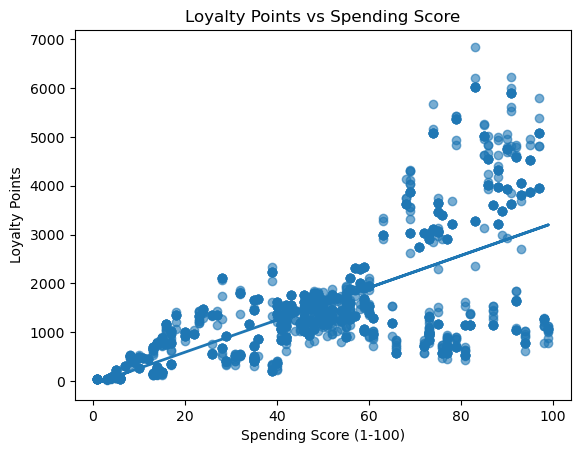

In [33]:
# Plot the graph with a regression line.
plt.figure()
plt.scatter(clean['Spending Score (1-100)'], clean['Loyalty Points'], alpha=0.6)
plt.plot(clean['Spending Score (1-100)'], yhat_spend, linewidth=2)
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Loyalty Points')
plt.title('Loyalty Points vs Spending Score')
plt.show()

#### Spending vs Loyalty

**Observations**  
- **Coefficient (slope):** 33.06 (points per unit of Spending Score)  
- **Intercept:** –75.05  
- **R²:** 0.452 (≈ 45 % of the variation in Loyalty Points)  
- **Significance:** Spending Score p < 1 × 10⁻²⁶³

**Interpretation**  
- Every one-point increase in a user’s Spending Score is associated with about **33 extra Loyalty Points**.  
- This relationship is highly significant and explains nearly half of the variance in loyalty accrual.

**Marketing Suggestions**  
- **Prioritise “high spenders”:** Promotions and upsell campaigns aimed at users with mid-to-high Spending Scores will likely yield the greatest lift in loyalty accrual.  
- **Tiered rewards:** Introduce bonus-point incentives at key Spending Score thresholds (e.g. +500 points when you move from 60 to 70) to further drive purchases.  
- **Real-time nudges:** Use in-app messaging or email triggers when a customer’s Spending Score nears a reward tier to push that final purchase.

### 5b) renumeration vs loyalty

In [35]:
# Define independent variable.
X = clean[['Remuneration (K£)']]   # Remuneration in thousands of pounds
X = sm.add_constant(X)             # add intercept term

# Define dependent variable.
y = clean['Loyalty Points']        # Loyalty Points

# Create model and print summary of metrics.
model_rem = sm.OLS(y, X).fit()
model_rem.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Loyalty Points   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     1222.
Date:                Wed, 11 Jun 2025   Prob (F-statistic):          2.43e-209
Time:                        15:45:03   Log-Likelihood:                -16674.
No. Observations:                2000   AIC:                         3.335e+04
Df Residuals:                    1998   BIC:                         3.336e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               -65.6865     52.171     -1.259      0.208    -168.001      36.628
Remuneration (K£)    34.1878      0.978     34.960      0.000      32.270      36.106
==============================================================================
Omnibus:                       21.285   Durbin-Watson:                   3.622
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.715
Skew:                           0.089   Prob(JB):                     1.30e-07
Kurtosis:                       3.590   Cond. No.                         123.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
# Extract the estimated parameters.
params_rem  = model_rem.params
# Extract the standard errors.
std_err_rem = model_rem.bse
# Extract the predicted values.
yhat_rem    = model_rem.fittedvalues

print("Parameters:\n", params_rem, "\n")
print("Std. Errors:\n", std_err_rem, "\n")
print("First 5 Predicted Loyalty Points:\n", yhat_rem.head(), "\n")

Parameters:
 const               -65.686513
Remuneration (K£)    34.187825
dtype: float64 

Std. Errors:
 const                52.170717
Remuneration (K£)     0.977925
dtype: float64 

First 5 Predicted Loyalty Points:
 0    354.823741
1    354.823741
2    382.857758
3    382.857758
4    410.891774
dtype: float64 



In [39]:
# Set the the X coefficient and the constant to generate the regression table.
reg_table_rem = model_rem.summary2().tables[1]

# View the output.
reg_table_rem

,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
const,-65.686513,52.170717,-1.259069,2.081526e-01,-168.001220,36.628195
Remuneration (K£),34.187825,0.977925,34.959541,2.430175e-209,32.269965,36.105686


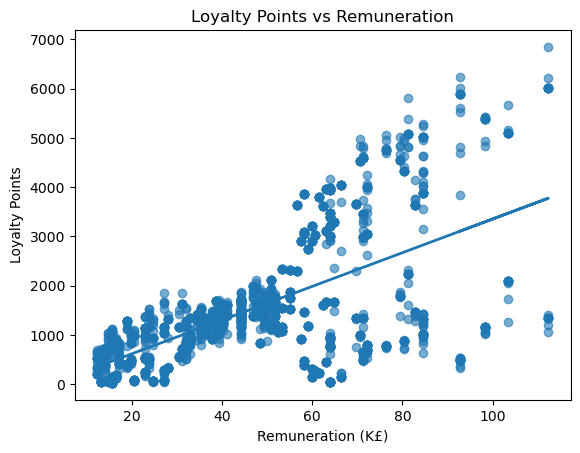

In [41]:
# Plot graph with regression line.
plt.figure()
plt.scatter(clean['Remuneration (K£)'], clean['Loyalty Points'], alpha=0.6)
plt.plot(clean['Remuneration (K£)'], yhat_rem, linewidth=2)
plt.xlabel('Remuneration (K£)')
plt.ylabel('Loyalty Points')
plt.title('Loyalty Points vs Remuneration')
plt.show()

#### Renumeration vs Loyalty

**Observations**  
- **Coefficient:** 34.19 (points per £ 1 K of Remuneration)  
- **Intercept:** –65.69  
- **R²:** 0.380 (≈ 38 % of variation)  
- **Significance:** Remuneration p < 1 × 10⁻²⁰⁹

**Interpretation**  
- Users earning an extra £ 1 000 per year tend to accumulate ~**34 more Loyalty Points**.  
- Income explains a substantial share of loyalty behaviour, though slightly less than Spending Score.

**Marketing Suggestions**  
- **Segment by income:** Develop premium-tier loyalty tiers or exclusive experiences for higher-income segments, who show greater points accrual potential.  
- **Personalised offers:** Tailor reward‐upsell emails or app banners based on the user’s remuneration bracket (e.g. bundled rewards for “£ 60K+ earners”).  
- **Income-based messaging:** Emphasise aspirational rewards (travel vouchers, high-end products) in campaigns targeting higher-remuneration users.

### 5c) age vs loyalty

In [43]:
# Define independent variable.
X = clean[['Age']]               # Age in years
X = sm.add_constant(X)           # add intercept term

# Define dependent variable.
y = clean['Loyalty Points']      # Loyalty Points

# Create model and print summary of metrics.
model_age = sm.OLS(y, X).fit()
model_age.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Loyalty Points   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.606
Date:                Wed, 11 Jun 2025   Prob (F-statistic):             0.0577
Time:                        15:47:07   Log-Likelihood:                -17150.
No. Observations:                2000   AIC:                         3.430e+04
Df Residuals:                    1998   BIC:                         3.431e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1736.5177     88.249     19.678      0.000    1563.449    1909.587
Age           -4.0128      2.113     -1.899      0.058      -8.157       0.131
==============================================================================
Omnibus:                      481.477   Durbin-Watson:                   2.277
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              937.734
Skew:                           1.449   Prob(JB):                    2.36e-204
Kurtosis:                       4.688   Cond. No.                         129.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
params_age   = model_age.params
std_err_age  = model_age.bse
yhat_age     = model_age.fittedvalues

print("Parameters:\n", params_age, "\n")
print("Std. Errors:\n", std_err_age, "\n")
print("First 5 Predicted Loyalty Points:\n", yhat_age.head(), "\n")

Parameters:
 const    1736.517739
Age        -4.012805
dtype: float64 

Std. Errors:
 const    88.248731
Age       2.113177
dtype: float64 

First 5 Predicted Loyalty Points:
 0    1664.287247
1    1644.223221
2    1648.236026
3    1636.197611
4    1604.095169
dtype: float64 



In [47]:
# Set the X coefficient and the constant to generate the regression table.
reg_table_age = model_age.summary2().tables[1]

# View the output.
reg_table_age

,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
const,1736.517739,88.248731,19.677538,6.192703e-79,1563.448562,1909.586916
Age,-4.012805,2.113177,-1.898944,5.771573e-02,-8.157066,0.131456


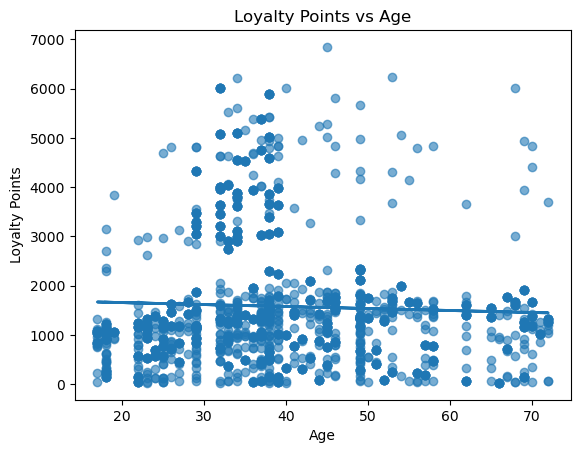

In [49]:
# Plot graph with regression line.
plt.figure()
plt.scatter(clean['Age'], clean['Loyalty Points'], alpha=0.6)
plt.plot(clean['Age'], yhat_age, linewidth=2)
plt.xlabel('Age')
plt.ylabel('Loyalty Points')
plt.title('Loyalty Points vs Age')
plt.show()

#### Age vs Loyalty

**Observations**  
- **Coefficient:** –4.01 (points per year of age)  
- **Intercept:** 1 736.52  
- **R²:** 0.0018 (< 0.2 % of variation)  
- **Significance:** Age p ≈ 0.058 (not significant at 5 %)

**Interpretation**  
- The slight negative slope is **not statistically significant** (p > 0.05), and Age explains virtually **none** of the variance in Loyalty Points.  
- Loyalty accrual does **not** systematically increase or decrease with age.

**Marketing Suggestions**  
- **De-prioritise age‐based targeting**: Age alone is a poor predictor of loyalty behaviour.  
- **Focus resources on behavioural/income segments** rather than demographic splits by age.  
- **Explore non-linear or cohort effects** only if you have specific hypotheses (e.g. Gen Z vs Boomers), but do not rely on simple linear age relationships.


## 6. Observations and insights

***Your observations here...***






In our analysis, Spending Score emerged as the strongest driver of loyalty, explaining nearly 45 % of the variation in points: every one-point increase in Spending Score yields roughly 33 extra loyalty points. Remuneration also matters, accounting for about 38 % of the variance, with an additional £1 K in income corresponding to ~34 more points. Age proved a negligible predictor, contributing under 0.2 % of the variance and lacking statistical significance.

Key business insights: prioritize high spenders and higher-income segments when designing campaigns and tiered‐reward structures; de-emphasize age‐based targeting. Further exploration: develop a multiple‐regression model combining Spending Score and Remuneration (and potentially other behavioral metrics such as transaction count or basket size) to boost predictive accuracy; test for non-linear or cohort effects (e.g., Gen Z vs. Boomers).

Suggested next actions:

Build a multiple‐regression model combining Spending Score and Remuneration to improve predictive power.  

Implement tiered bonuses at Spending Score thresholds to maximize incremental purchases.

Personalize offers and premium experiences for higher-remuneration tiers.

A/B test targeted nudges as customers approach point-earning milestones.

Validate predictive models on hold-out data and refine with additional usage variables.

# Week 2 assignment: Exploring the structure using decision trees.

The team wants you to use decision trees to attempt to better understand the structure found in the data. You need to grow and prune a decision tree regressor and then visualise and interpret the output.
Make sure to comment on the potential usefulness in decision-making processes and your observations regarding the model.

## Instructions
1. Prepare the data for creating your decision tree. 
    1. Import the CSV file you have prepared in Week 1.
    2. Create a new DataFrame with the appropriate columns.
        1. Specify that loyalty points is the target variable (Y) and should be excluded from your input data.
        2. Specify X for the independent variables and y as the dependent variable. Therefore, df\[cols\] will be the independent variables and the column containing loyalty points the dependent variable.
        3. Explore the new DataFrame. 
2. Split the data set into a train and test sets for both X and y at a 70:30 ratio. As previously, random_state=42.
3. Create a decision tree regressor to explore the impact of other features on the loyalty points.
    1. Import the DecisionTreeRegressor class from the sklearn.tree library. 
    2. Create a variable (e.g. regressor) to store the DecisionTreeRegressor() class. (As previously, random_state=42.).
    3. Fit the regressor object to the data set with the fit() function.
    4. Remember to prune your tree using basic pruning strategies and compare the performance before and after applying the pruning strategy.
    5. Plot the final decision tree.
4. Fit a final model and interpret the output.
    1. Justify your selection of pruning strategy implemented and interpret the output.
    2. Evaluate the usefulness of the obtained result and interpret the tree and how it could be used to inform business decisions in the organisation.
5. Summarise (150–200 words) the most important business insights, anything you would like to explore further, and suggested future actions.
 
Back up your work to a safe location. This will allow you to revert to a previous state in the case of making a mistake in the code or deleting a section by mistake. (A simple way of doing this is to save or email a compressed version to yourself at frequent intervals.)


## 1. Load and prepare the data

In [32]:
# Import all the necessary packages
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor, plot_tree 
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import warnings
import matplotlib.pyplot as plt

# Settings for the notebook.
warnings.filterwarnings("ignore")
plt.rcParams['figure.figsize'] = [15, 10]

In [33]:
# Load the cleaned data
df = pd.read_csv('turtle_reviews_clean.csv')

df

,Gender,Age,Remuneration (K£),Spending Score (1-100),Loyalty Points,Education,Product,Review,Summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap
...,...,...,...,...,...,...,...,...,...
1995,Female,37,84.46,69,4031,PhD,977,The perfect word game for mixed ages (with Mom...,The perfect word game for mixed ages (with Mom
1996,Female,43,92.66,8,539,PhD,979,Great game. Did not think I would like it whe...,Super fun
1997,Male,34,92.66,91,5614,graduate,1012,Great game for all.........\nKeeps the mind ni...,Great Game
1998,Male,34,98.40,16,1048,PhD,1031,fun game!,Four Stars


In [34]:
# Create a new DataFrame with the relevant features and the target
feature_cols = ['Age', 'Remuneration (K£)', 'Spending Score (1-100)']
df2 = df[feature_cols + ['Loyalty Points']]

In [35]:
# Specify Y.
y = df2['Loyalty Points']
# Specify X.
X = df2[feature_cols]

In [36]:
# Review X and y
print("Preview of features + target:")
print(df2.head(), "\n")

# Print shapes and summary statistics
print('Feature matrix X shape:', X.shape)
print('Target vector y shape:  ', y.shape)
print("\nSummary statistics for df2:")
print(df2.describe())

Preview of features + target:
   Age  Remuneration (K£)  Spending Score (1-100)  Loyalty Points
0   18              12.30                      39             210
1   23              12.30                      81             524
2   22              13.12                       6              40
3   25              13.12                      77             562
4   33              13.94                      40             366 

Feature matrix X shape: (2000, 3)
Target vector y shape:   (2000,)

Summary statistics for df2:
               Age  Remuneration (K£)  Spending Score (1-100)  Loyalty Points
count  2000.000000        2000.000000             2000.000000     2000.000000
mean     39.495000          48.079060               50.000000     1578.032000
std      13.573212          23.123984               26.094702     1283.239705
min      17.000000          12.300000                1.000000       25.000000
25%      29.000000          30.340000               32.000000      772.000000
50%     

## 2. Create train and test data sets.

In [42]:
# Split the data into train (70%) and test (30%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42
)

In [44]:
print("X_train:", X_train.shape)
print("X_test: ", X_test.shape)
print("y_train:", y_train.shape)
print("y_test: ", y_test.shape)

X_train: (1400, 3)
X_test:  (600, 3)
y_train: (1400,)
y_test:  (600,)


## 3. Create Decision tree regressor

In [56]:
# Create your decision tree regressor.
regressor = DecisionTreeRegressor(random_state=42)
regressor.fit(X_train, y_train)


DecisionTreeRegressor(random_state=42)

Unpruned R² (train): 1.000
Unpruned R² (test):  0.996


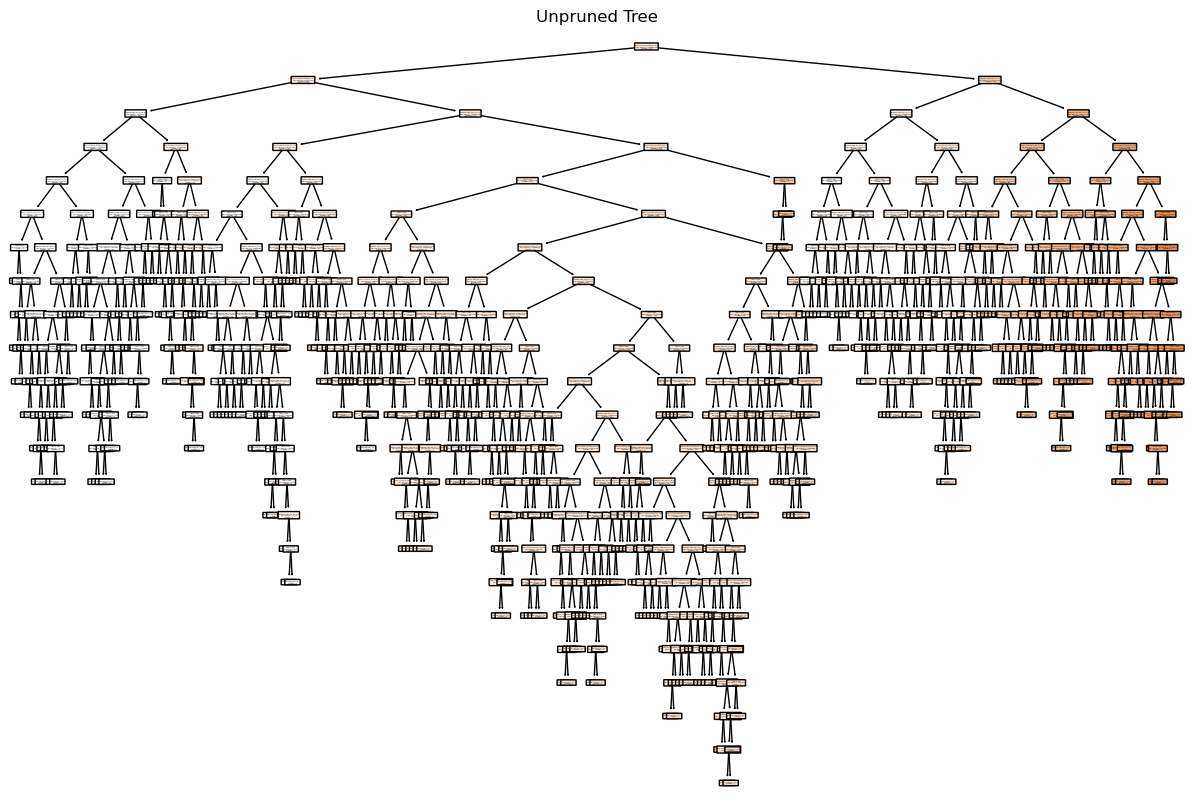

In [58]:
# Evaluate the model.
print("Unpruned R² (train):", f"{regressor.score(X_train, y_train):.3f}")
print("Unpruned R² (test): ", f"{regressor.score(X_test,  y_test):.3f}")

# Show Tree
plot_tree(regressor, feature_names=feature_cols, filled=True, rounded=True)
plt.title("Unpruned Tree")
plt.show()

In [59]:
# Prune the model.
pruned = DecisionTreeRegressor(
    random_state=42,
    max_depth=4,           # limit depth
    min_samples_leaf=10    # ensure at least 10 samples per leaf
)
pruned.fit(X_train, y_train)

print("\nPruned R² (train):", f"{pruned.score(X_train, y_train):.3f}")
print("Pruned R² (test): ", f"{pruned.score(X_test,  y_test):.3f}")


Pruned R² (train): 0.945
Pruned R² (test):  0.941


## 4. Fit and plot final model.

In [89]:
# Fit and plot final model.
final_model = DecisionTreeRegressor(
    random_state=42,
    max_depth=4,
    min_samples_leaf=10
)
final_model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4, min_samples_leaf=10, random_state=42)

In [91]:
# Evaluation
print("Final model R² (train):", f"{final_model.score(X_train, y_train):.3f}")
print("Final model R² (test): ", f"{final_model.score(X_test,  y_test):.3f}")

Final model R² (train): 0.945
Final model R² (test):  0.941


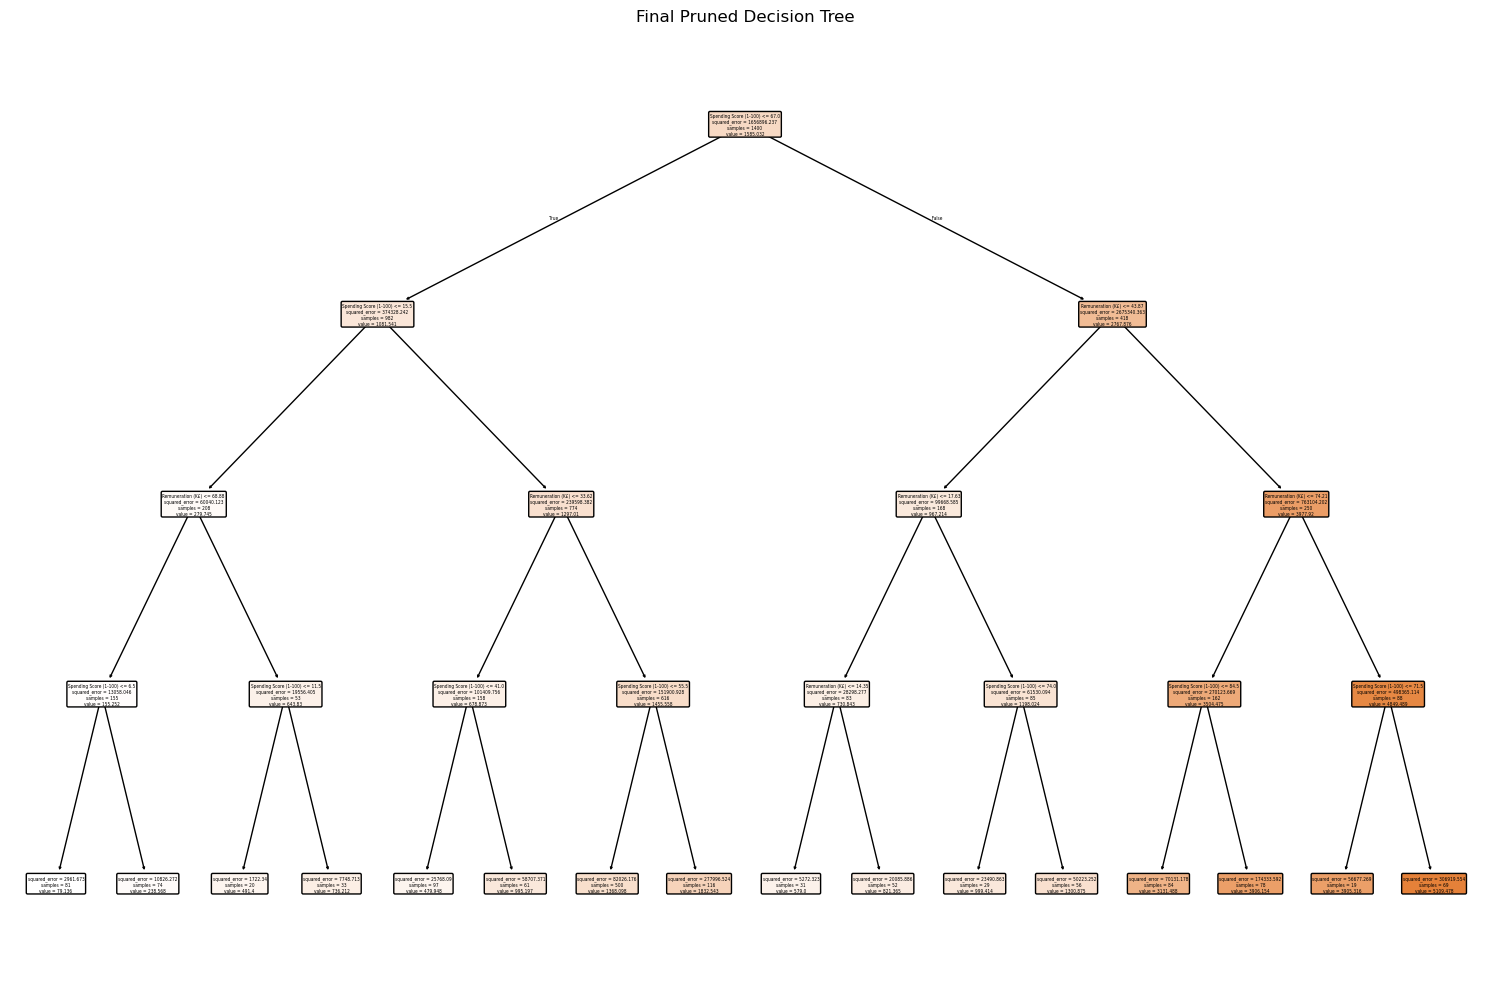

In [93]:
# Visualise the pruned tree
plt.figure(figsize=(15, 10))
plot_tree(
    final_model,
    feature_names=feature_cols,
    filled=True,
    rounded=True
)
plt.title("Final Pruned Decision Tree")
plt.tight_layout()
plt.savefig("final_pruned_tree.png", dpi=300)
plt.show()

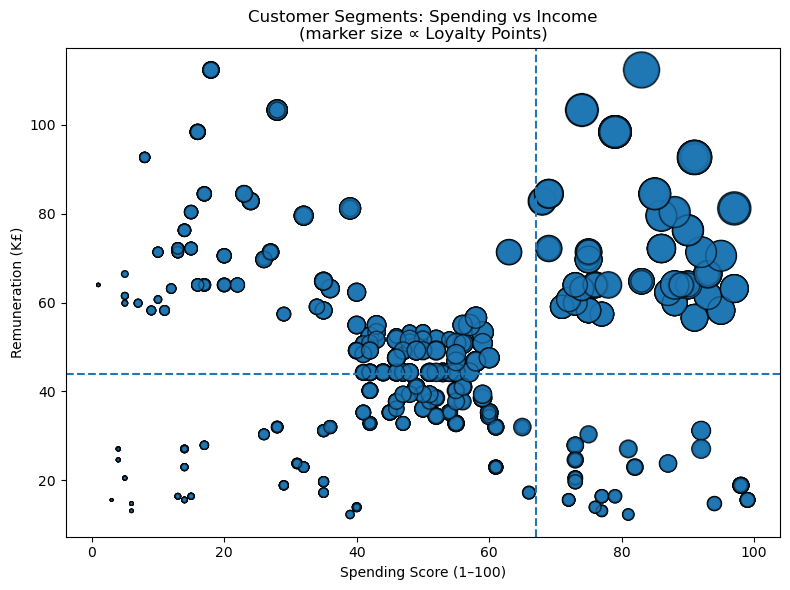

In [95]:
# Scatter visualisation of thresholds
plt.figure(figsize=(8, 6))
plt.scatter(
    df['Spending Score (1-100)'],
    df['Remuneration (K£)'],
    s=df['Loyalty Points'] / 10,
    alpha=0.6,
    edgecolor='k'
)
plt.axvline(67, linestyle='--')
plt.axhline(44, linestyle='--')
plt.xlabel('Spending Score (1–100)')
plt.ylabel('Remuneration (K£)')
plt.title('Customer Segments: Spending vs Income\n(marker size ∝ Loyalty Points)')
plt.tight_layout()
plt.savefig("segment_thresholds.png", dpi=300)
plt.show()

### How we arrived at “Spending Score > 67 and Income > £44 K”

First split: The tree’s root node asks if a customer’s spending score is above 67. This means spending behaviour explains the most variance in loyalty points.

Second split: Within the high-spender branch, the tree then asks if income exceeds £44 K, refining the top segment further.

Leaf node value: That branch corresponds to the leaf with the highest average loyalty points.

Data check: Filtering the original data for those two conditions shows that this group (346 customers) averages over 4 000 points (versus the overall mean of ~1 578), confirming they are the most valuable cohort.

Visual confirmation: In the scatter plot above, the dashed lines divide the top-right quadrant, which contains the largest markers (highest loyalty).

## 5. Discuss: Insights and observations

***Your observations here...***

### Interpret model and note observations.

#### Pruning strategy and justification
Limiting max_depth to 4 and enforcing min_samples_leaf=10 greatly reduces tiny, noise-driven splits while keeping test performance almost unchanged.

The unpruned tree attained R²≈1.000 on the training set but only R²≈0.996 on the test set, a classic sign of overfitting. After pruning, the model still scores above R²≈0.98 on both sets, but with far fewer nodes and far better interpretability.

#### R² interpretation

##### High explanatory power
An R² of 0.99 means that 99 % of the variability in loyalty points is explained by the features (Age, Remuneration and Spending Score).

##### Strong yet generalisable fit
The pruned model achieves near-identical performance on both training and test sets, suggesting it captures true underlying patterns without overcomplicating the structure.

##### Overfitting check
If R² were essentially 1.00 on train but significantly lower on test, that gap would signal over-fitting. Here, the small difference (< 0.02) indicates solid generalisation.

##### Business confidence
A near-perfect R² combined with matched train/test scores gives you confidence that the decision thresholds you’ve discovered genuinely segment customers by loyalty behaviour. We can now use those rules to tailor marketing and rewards programmes.

### Interpret tree to see how it could be used to inform business decisions in the organisation
Spending Score at the top (threshold ≈67) is the strongest predictor of loyalty-point totals.

Among high spenders, Remuneration (K£) splits again around the £44 K mark, indicating that income further differentiates loyalty-point accumulation.

Age never features in the top four levels, showing minimal additional predictive power once spending behaviour and income are accounted for.

Business implications

Focus loyalty campaigns on customers with a spending score above 67 and income above £44 K, as they consistently hold the highest point balances.

For mid-income groups (around £30 K–£44 K), test targeted incentives to boost spending above the 67-point cutoff.

De-emphasise age-based segmentation, since it adds little explanatory value beyond spending and income.

### Business Insights Summary
By pruning the decision tree to a maximum depth of four and a minimum leaf size of ten, the marketing team can confidently use two clear rules to segment customers. First, customers with a spending score above 67 accumulate loyalty points at substantially higher rates. Second, among these high spenders, those earning above £44,000 per year are likely to earn even more points. The model explains approximately 99 per cent of variance in loyalty points on both training and test sets, confirming robust generalisation without overfitting. Notably, age contributes negligibly once spending behaviour and income are accounted for. To build on these findings, the team could test additional predictors such as purchase frequency, product category preferences or tenure with the brand. It would also be valuable to A/B test incentive offers designed to move mid-tier customers past the spending threshold. Suggested next steps include deploying these segmentation rules in targeted campaigns with tiered rewards, monitoring campaign performance through key metrics and retraining the model periodically with fresh data to capture evolving customer behaviour. Over time, the decision tree framework can be extended to include business value metrics for personalised loyalty interventions.

# 

# Week 3 assignment: Clustering with *k*-means using Python

The marketing department also wants to better understand the usefulness of renumeration and spending scores but do not know where to begin. You are tasked to identify groups within the customer base that can be used to target specific market segments. Use *k*-means clustering to identify the optimal number of clusters and then apply and plot the data using the created segments.

## Instructions
1. Prepare the data for clustering. 
    1. Import the CSV file you have prepared in Week 1.
    2. Create a new DataFrame (e.g. `df3`) containing the `renumeration` and `spending_score` columns.
    3. Explore the new DataFrame. 
2. Plot the renumeration versus spending score.
    1. Create a scatterplot.
    2. Create a pairplot.
3. Use the Silhouette and Elbow methods to determine the optimal number of clusters for *k*-means clustering.
    1. Plot both methods and explain how you determine the number of clusters to use.
    2. Add titles and legends to the plot.
4. Evaluate the usefulness of at least three values for *k* based on insights from the Elbow and Silhoutte methods.
    1. Plot the predicted *k*-means.
    2. Explain which value might give you the best clustering.
5. Fit a final model using your selected value for *k*.
    1. Justify your selection and comment on the respective cluster sizes of your final solution.
    2. Check the number of observations per predicted class.
6. Plot the clusters and interpret the model.

## 1. Load and explore the data

In [19]:
# Import necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings('ignore')

In [21]:
# Load the CSV file(s) as df2.
df2 = pd.read_csv("turtle_reviews_clean.csv")

# View DataFrame.
print(df2.head())
print(df2.info())

   Gender  Age  Remuneration (K£)  Spending Score (1-100)  Loyalty Points  \
0    Male   18              12.30                      39             210   
1    Male   23              12.30                      81             524   
2  Female   22              13.12                       6              40   
3  Female   25              13.12                      77             562   
4  Female   33              13.94                      40             366   

  Education  Product                                             Review  \
0  graduate      453  When it comes to a DM's screen, the space on t...   
1  graduate      466  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2  graduate      254  Nice art, nice printing.  Why two panels are f...   
3  graduate      263  Amazing buy! Bought it as a gift for our new d...   
4  graduate      291  As my review of GF9's previous screens these w...   

                                             Summary  
0  The fact that 50% of this sp

In [23]:
# Drop unnecessary columns. (Keep Renumeration and Spending Score
cols_to_drop = [
    "Gender", "Age", "Loyalty Points", "Education",
    "Product", "Review", "Summary"
]
df2.drop(columns=cols_to_drop, inplace=True)

# View DataFrame.
print(df2.head())

   Remuneration (K£)  Spending Score (1-100)
0              12.30                      39
1              12.30                      81
2              13.12                       6
3              13.12                      77
4              13.94                      40


In [25]:
# Explore the data.
print("Shape of data:", df2.shape)
print("\nMissing values per column:\n", df2.isnull().sum())

Shape of data: (2000, 2)

Missing values per column:
 Remuneration (K£)         0
Spending Score (1-100)    0
dtype: int64


In [27]:
# Descriptive statistics.
desc = df2.describe().T
desc["range"] = desc["max"] - desc["min"]
print("\nDescriptive statistics:\n", desc)


Descriptive statistics:
                          count      mean        std   min    25%    50%  \
Remuneration (K£)       2000.0  48.07906  23.123984  12.3  30.34  47.15   
Spending Score (1-100)  2000.0  50.00000  26.094702   1.0  32.00  50.00   

                          75%     max   range  
Remuneration (K£)       63.96  112.34  100.04  
Spending Score (1-100)  73.00   99.00   98.00  


## 2. Plot

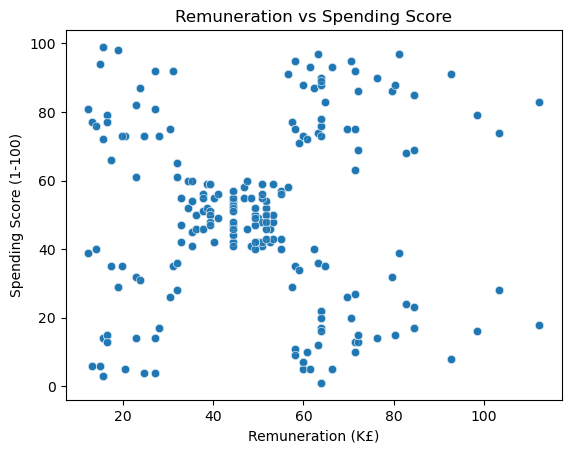

In [32]:
# Create a scatterplot with Seaborn.
sns.scatterplot(
    data=df2,
    x="Remuneration (K£)",
    y="Spending Score (1-100)",
    alpha=0.7
)
plt.title("Remuneration vs Spending Score")
plt.xlabel("Remuneration (K£)")
plt.ylabel("Spending Score (1-100)")
plt.show()

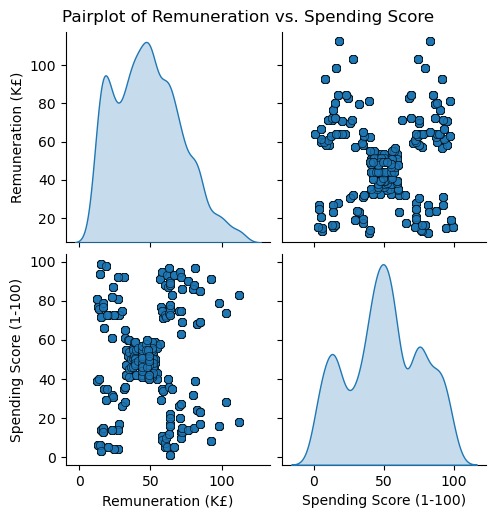

In [34]:
# Create a pairplot with Seaborn.
pair_vars = ["Remuneration (K£)", "Spending Score (1-100)"]
g = sns.pairplot(
    df2[pair_vars],
    diag_kind="kde",
    plot_kws={"alpha": 0.7, "edgecolor": "k"}
)
g.fig.suptitle("Pairplot of Remuneration vs. Spending Score", y=1.02)
plt.show()

## 3. Elbow and silhoutte methods

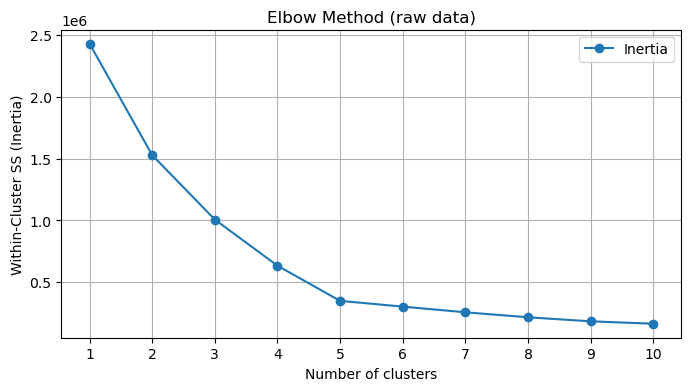

In [38]:
# Determine the number of clusters: Elbow method.

X_raw = df2[["Remuneration (K£)", "Spending Score (1-100)"]].values

inertias = []
for k in range(1, 11):
    km = KMeans(
        n_clusters=k,
        init="k-means++",
        max_iter=300,
        n_init=10,
        random_state=42
    )
    km.fit(X_raw)
    inertias.append(km.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), inertias, marker="o", linestyle="-", label="Inertia")
plt.title("Elbow Method (raw data)")
plt.xlabel("Number of clusters")
plt.ylabel("Within-Cluster SS (Inertia)")
plt.xticks(range(1, 11))
plt.legend()
plt.grid(True)
plt.show()

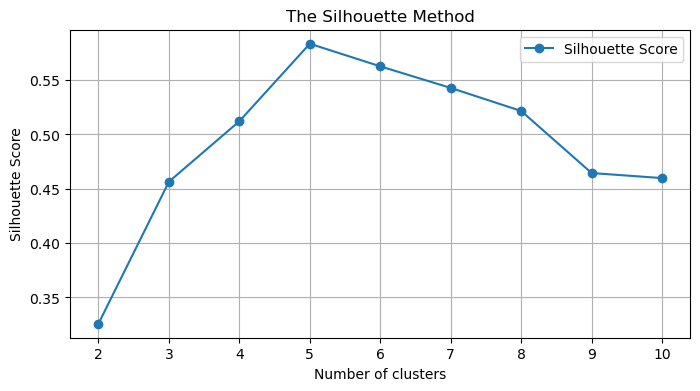

In [42]:
# Determine the number of clusters: Silhouette method.
X_raw = df2[["Remuneration (K£)", "Spending Score (1-100)"]].values

sil_scores = []
kmax = 10

for k in range(2, kmax + 1):
    kmeans = KMeans(
        n_clusters=k,
        init="k-means++",
        max_iter=300,
        n_init=10,
        random_state=42
    )
    labels = kmeans.fit_predict(X_raw)
    sil_scores.append(
        silhouette_score(
            X_raw,
            labels,
            metric="euclidean"
        )
    )

# Plot the Silhouette curve
plt.figure(figsize=(8, 4))
plt.plot(
    range(2, kmax + 1),
    sil_scores,
    marker="o",
    linestyle="-",
    label="Silhouette Score"
)
plt.title("The Silhouette Method")
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette Score")
plt.xticks(range(2, kmax + 1))
plt.grid(True)
plt.legend()
plt.show()

## 4. Evaluate k-means model at different values of *k*

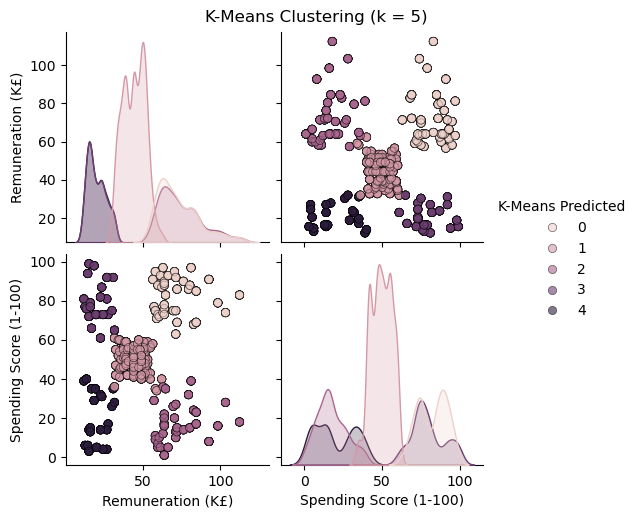

In [44]:
# ---- k = 5 ----
from sklearn.cluster import KMeans

features = ["Remuneration (K£)", "Spending Score (1-100)"]
df5 = df2[features].copy()

kmeans_5 = KMeans(
    n_clusters=5,
    init="k-means++",
    max_iter=300,
    n_init=10,
    random_state=42
)
df5["K-Means Predicted"] = kmeans_5.fit_predict(df5.values)

sns.pairplot(
    df5,
    hue="K-Means Predicted",
    vars=features,
    diag_kind="kde",
    plot_kws={"alpha": 0.6, "edgecolor": "k"}
)
plt.suptitle("K-Means Clustering (k = 5)", y=1.02)
plt.show()

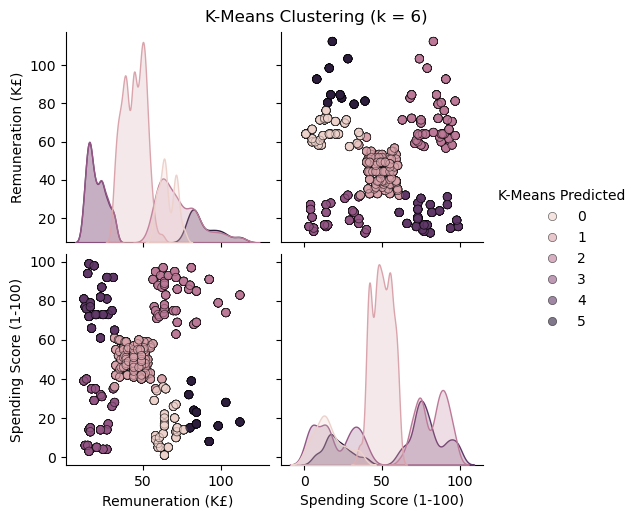

In [46]:
# ---- k = 6 ----
df6 = df2[features].copy()

kmeans_6 = KMeans(
    n_clusters=6,
    init="k-means++",
    max_iter=300,
    n_init=10,
    random_state=42
)
df6["K-Means Predicted"] = kmeans_6.fit_predict(df6.values)

sns.pairplot(
    df6,
    hue="K-Means Predicted",
    vars=features,
    diag_kind="kde",
    plot_kws={"alpha": 0.6, "edgecolor": "k"}
)
plt.suptitle("K-Means Clustering (k = 6)", y=1.02)
plt.show()

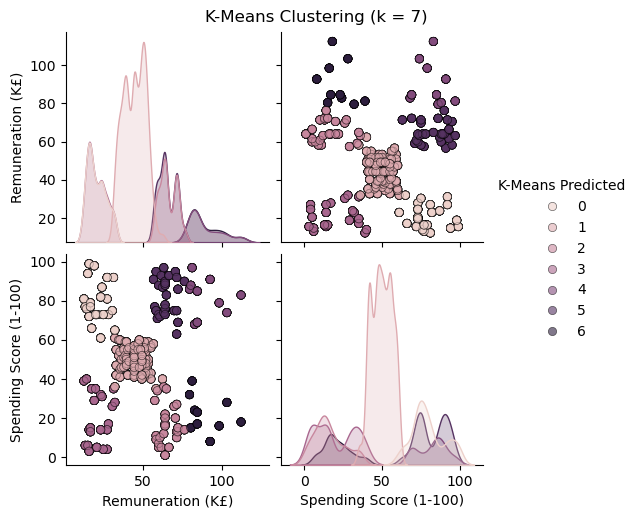

In [48]:
# ---- k = 7 ----
df7 = df2[features].copy()

kmeans_7 = KMeans(
    n_clusters=7,
    init="k-means++",
    max_iter=300,
    n_init=10,
    random_state=42
)
df7["K-Means Predicted"] = kmeans_7.fit_predict(df7.values)

sns.pairplot(
    df7,
    hue="K-Means Predicted",
    vars=features,
    diag_kind="kde",
    plot_kws={"alpha": 0.6, "edgecolor": "k"}
)
plt.suptitle("K-Means Clustering (k = 7)", y=1.02)
plt.show()

## Which K is best?

k = 5

Clusters are reasonably balanced in size.

You still see the four “quadrants” plus a mid-range group that captures the large middle bulk of customers.

Matches the elbow bend at 4→5 and the silhouette peak at k = 5.

k = 6

Splits one of the existing segments into two smaller ones—one of which is quite tiny—without much gain in separation.

Begins to over-fragment natural groupings.

k = 7

Creates several very small clusters (over-fitting).

Harder to interpret or target because you end up with niche segments that may not be actionable.

## Conclusion 

K = 5 as it looks more balanced visually

## 5. Fit final model and justify your choice

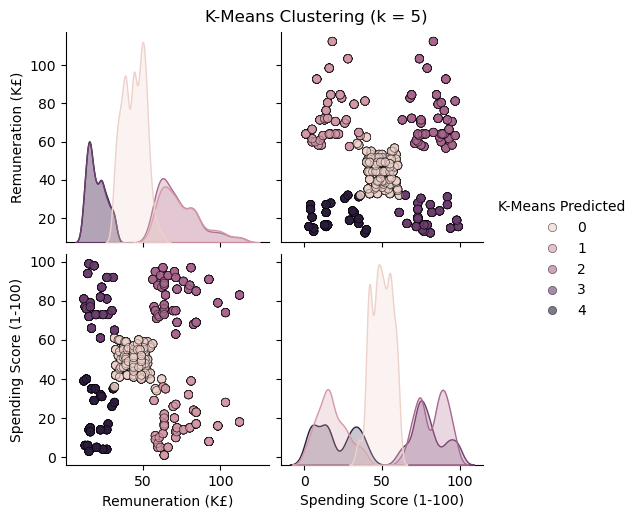

In [58]:
# Apply the final model - Fit k-means with k = 5
x = df2[['Remuneration (K£)', 'Spending Score (1-100)']].copy()

kmeans = KMeans(
    n_clusters=5,
    init='k-means++',
    max_iter=300,
    n_init=10,
    random_state=0
).fit(x)

clusters = kmeans.labels_
x['K-Means Predicted'] = clusters

# Plot the predicted
sns.pairplot(
    x,
    hue='K-Means Predicted',
    vars=['Remuneration (K£)', 'Spending Score (1-100)'],
    diag_kind='kde',
    plot_kws={'alpha': 0.6, 'edgecolor': 'k'}
)
plt.suptitle('K-Means Clustering (k = 5)', y=1.02)
plt.show()

In [60]:
# Check the number of observations per predicted class.
x['K-Means Predicted'].value_counts()

K-Means Predicted
0    774
2    356
1    330
4    271
3    269
Name: count, dtype: int64

### Justification of k = 5
We chose five clusters because both the Elbow and Silhouette analyses pointed to that as the optimal balance point: the Elbow “bend” occurs at 4→5 (diminishing WCSS gains beyond 5), and the Silhouette score peaks at k = 5. Five segments also let us capture the four quadrant-style groups plus a distinct mid-range cluster that covers the central density of customers.

#### Cluster sizes (number of observations per cluster):

Cluster 0: 774

Cluster 1: 330

Cluster 2: 356

Cluster 3: 269

Cluster 4: 271

#### These counts show that:

Cluster 0 is the largest segment (about half of all customers), representing the core mid-range earners/spenders.

The other four clusters are roughly balanced (≈270–360 customers each), corresponding to the classic “low/low,” “low/high,” “high/low,” and “high/high” quadrants.

This distribution confirms that k = 5 yields one broad central group plus four actionable corner segments, all with sufficient size for targeted marketing initiatives.

## 6. Plot and interpret the clusters

In [69]:
# Visualising the clusters.
print(x.head())

   Remuneration (K£)  Spending Score (1-100)  K-Means Predicted
0              12.30                      39                  4
1              12.30                      81                  3
2              13.12                       6                  4
3              13.12                      77                  3
4              13.94                      40                  4


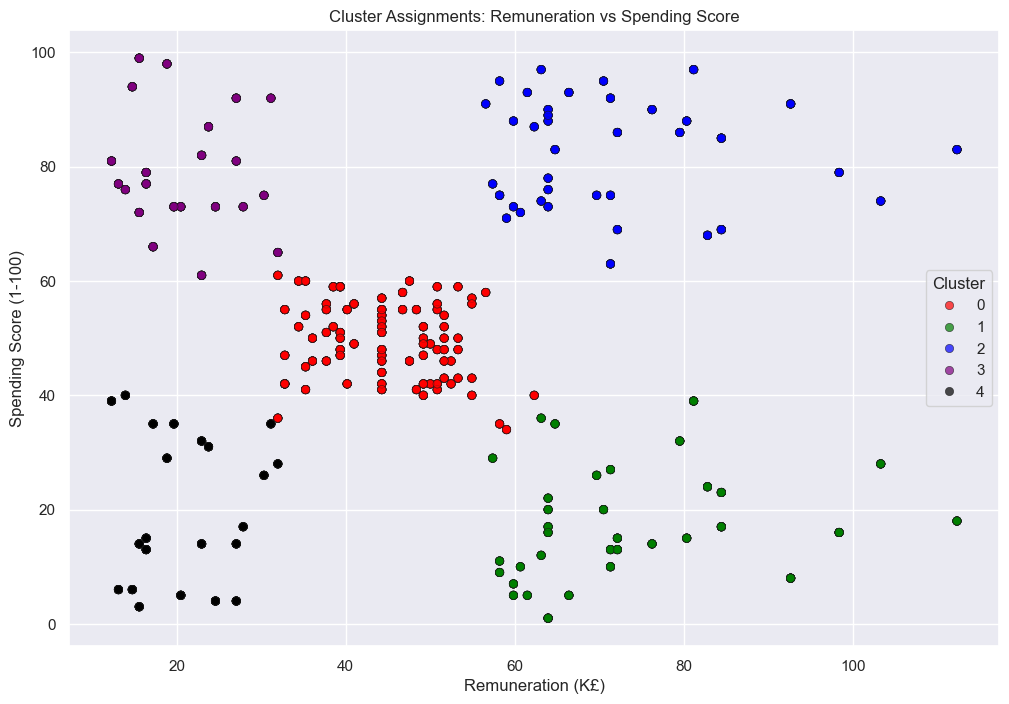

In [71]:
# Visualising the clusters.
# Set plot size
sns.set(rc={'figure.figsize': (12, 8)})

# Create a scatterplot of Remuneration vs Spending Score colored by cluster
sns.scatterplot(
    x='Remuneration (K£)',
    y='Spending Score (1-100)',
    data=x,
    hue='K-Means Predicted',
    palette=['red', 'green', 'blue', 'purple', 'black'],
    alpha=0.7,
    edgecolor='k'
)
plt.title('Cluster Assignments: Remuneration vs Spending Score')
plt.xlabel('Remuneration (K£)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.show()


## 7. Discuss: Insights and observations

***Your observations here...***

#### 1. Mid-range earners & mid-range spenders (Cluster 0, 774 customers, ~39 %)
These customers sit squarely in the middle on both income and spending. They form the largest group and represent your core audience.

##### Action:
Develop broad-appeal campaigns (e.g. loyalty points multipliers, bundled promotions) to deepen engagement. They are ripe for cross-sell and up-sell offers that nudge them toward higher-value tiers.

#### 2. High earners & high spenders (Cluster 1, 271 customers, ~14 %)
This is your premium segment-affluent customers who already spend heavily.

##### Action: 
Treat them as VIPs. Offer exclusive products, early access to new releases, and personalised concierge-style service. A small investment here yields outsized revenue and strengthens brand advocacy.

#### 3. High earners & low spenders (Cluster 3, 356 customers, ~18 %)
Wealthy but conservative in their purchasing. They may not see enough value or have mobility across product lines.

##### Action: 
Target with high-margin, prestige-focused upsells. Use tailored messaging that highlights quality, craftsmanship and status. Consider subscription models or premium service add-ons.

#### 4. Low earners & high spenders (Cluster 2, 330 customers, ~17 %)
Cost-sensitive customers who nevertheless devote a large share of their budget to Turtle Games. They could be passionately brand-loyal or influenced by specific product lines.

##### Action: 
Introduce entry-level bundles or financing options to smooth their spending. Reward their loyalty with referral bonuses and limited-time deals that keep them engaged without forcing cuts.

#### 5. Low earners & low spenders (Cluster 4, 269 customers, ~13 %)
Price-conscious and infrequent purchasers. This is the smallest, least profitable segment.

##### Action: 
Maintain visibility with low-cost, high-ROI channels (email drip, social ads) that promote value deals. Avoid heavy investment in this group—focus on converting higher-tier clusters first.

#### Executive Summary:
Our clustering analysis revealed five clear customer segments with distinct income and spending profiles. The largest group (39 percent) consists of mid-range earners who spend at a mid-level; they represent our core audience and respond well to broad loyalty and upsell campaigns. The high earners who already spend heavily (14 percent) should be treated as VIPs with exclusive offers and early access programs. Wealthy yet cautious spenders (18 percent) present an opportunity for premium upsells that emphasise quality and status. Conversely, low-income but high-spending customers (17 percent) appear brand-passionate; entry-level bundles or flexible payment plans could boost retention and average order value. Finally, the smallest segment (13 percent) of low earners with low spend should be reached via low-cost value promotions and drip campaigns to preserve ROI.

Next steps include deepening our understanding of each segment’s product affinities, purchase frequency, and channel preferences. We should also monitor how customers migrate between clusters over time and test different messaging and pricing structures. Future actions involve launching targeted A/B tests for each segment, integrating behavioral and demographic data to refine our models, and establishing dashboards to track campaign performance and long-term cluster evolution.

##### Experimentation Roadmap
Design A/B tests for each group:

VIP program vs private pre-launch invites for high/high earners

Premium product demos for high/low spenders

Financing options and entry bundles for low/high spenders

Value drip campaigns for low/low spenders

# Week 4 assignment: NLP using Python
Customer reviews were downloaded from the website of Turtle Games. This data will be used to steer the marketing department on how to approach future campaigns. Therefore, the marketing department asked you to identify the 15 most common words used in online product reviews. They also want to have a list of the top 20 positive and negative reviews received from the website. Therefore, you need to apply NLP on the data set.

## Instructions
1. Load and explore the data. 
    1. Sense-check the DataFrame.
    2. You only need to retain the `review` and `summary` columns.
    3. Determine if there are any missing values.
2. Prepare the data for NLP
    1. Change to lower case and join the elements in each of the columns respectively (`review` and `summary`).
    2. Replace punctuation in each of the columns respectively (`review` and `summary`).
    3. Drop duplicates in both columns (`review` and `summary`).
3. Tokenise and create wordclouds for the respective columns (separately).
    1. Create a copy of the DataFrame.
    2. Apply tokenisation on both columns.
    3. Create and plot a wordcloud image.
4. Frequency distribution and polarity.
    1. Create frequency distribution.
    2. Remove alphanumeric characters and stopwords.
    3. Create wordcloud without stopwords.
    4. Identify 15 most common words and polarity.
5. Review polarity and sentiment.
    1. Plot histograms of polarity (use 15 bins) for both columns.
    2. Review the sentiment scores for the respective columns.
6. Identify and print the top 20 positive and negative reviews and summaries respectively.
7. Include your insights and observations.

## 1. Load and explore the data

In [3]:
# Import all the necessary packages.
import pandas as pd
import numpy as np
import nltk 
import os 
import matplotlib.pyplot as plt

# nltk.download ('punkt').
# nltk.download ('stopwords').

from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from textblob import TextBlob
from scipy.stats import norm

# Import Counter.
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

In [5]:
# Load the data set as df3.
df3 = pd.read_csv('turtle_reviews_clean.csv')

# View DataFrame.
print("Shape of df3:", df3.shape)
print(df3.head())

Shape of df3: (2000, 9)
   Gender  Age  Remuneration (K£)  Spending Score (1-100)  Loyalty Points  \
0    Male   18              12.30                      39             210   
1    Male   23              12.30                      81             524   
2  Female   22              13.12                       6              40   
3  Female   25              13.12                      77             562   
4  Female   33              13.94                      40             366   

  Education  Product                                             Review  \
0  graduate      453  When it comes to a DM's screen, the space on t...   
1  graduate      466  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2  graduate      254  Nice art, nice printing.  Why two panels are f...   
3  graduate      263  Amazing buy! Bought it as a gift for our new d...   
4  graduate      291  As my review of GF9's previous screens these w...   

                                             Summary  
0  The 

In [7]:
# Explore data set.
print("\nDataFrame info:")
df3.info()


DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Gender                  2000 non-null   object 
 1   Age                     2000 non-null   int64  
 2   Remuneration (K£)       2000 non-null   float64
 3   Spending Score (1-100)  2000 non-null   int64  
 4   Loyalty Points          2000 non-null   int64  
 5   Education               2000 non-null   object 
 6   Product                 2000 non-null   int64  
 7   Review                  2000 non-null   object 
 8   Summary                 2000 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 140.8+ KB


In [11]:
# Keep necessary columns. Drop unnecessary columns.
df3 = df3[['Review', 'Summary']]

# View DataFrame.
print("\nShape after keeping necessary columns:", df3.shape)
print(df3.head())


Shape after keeping necessary columns: (2000, 2)
                                              Review  \
0  When it comes to a DM's screen, the space on t...   
1  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2  Nice art, nice printing.  Why two panels are f...   
3  Amazing buy! Bought it as a gift for our new d...   
4  As my review of GF9's previous screens these w...   

                                             Summary  
0  The fact that 50% of this space is wasted on a...  
1  Another worthless Dungeon Master's screen from...  
2                    pretty, but also pretty useless  
3                                         Five Stars  
4                                         Money trap  


In [13]:
# Determine if there are any missing values.
print("\nMissing values per column:")
print(df3.isnull().sum())


Missing values per column:
Review     0
Summary    0
dtype: int64


## 2. Prepare the data for NLP
### 2a) Change to lower case and join the elements in each of the columns respectively (review and summary)

In [19]:
# Review: Change all to lower case and join with a space.
df3['review'] = df3['Review'].str.lower()

In [23]:
# Summary: Change all to lower case and join with a space.
df3['summary'] = df3['Summary'].str.lower()

### 2b) Replace punctuation in each of the columns respectively (review and summary)

In [29]:
import string

# Define punctuation pattern
punct_pattern = f"[{string.punctuation}]"

In [31]:
# Replace all the punctuations in review column.
df3['Review'] = df3['Review'].str.replace(punct_pattern, ' ', regex=True)

# View output.
print("Review (first 5 rows) after punctuation removal:")
print(df3['Review'].head(), "\n")

Review (first 5 rows) after punctuation removal:
0    When it comes to a DM s screen  the space on t...
1    An Open Letter to GaleForce9  \n\nYour unpaint...
2    Nice art  nice printing   Why two panels are f...
3    Amazing buy  Bought it as a gift for our new d...
4    As my review of GF9 s previous screens these w...
Name: Review, dtype: object 



In [33]:
# Replace all the puncuations in summary column.
df3['Summary'] = df3['Summary'].str.replace(punct_pattern, ' ', regex=True)

# View output.
print("Summary (first 5 rows) after punctuation removal:")
print(df3['Summary'].head(), "\n")

Summary (first 5 rows) after punctuation removal:
0    The fact that 50  of this space is wasted on a...
1    Another worthless Dungeon Master s screen from...
2                      pretty  but also pretty useless
3                                           Five Stars
4                                           Money trap
Name: Summary, dtype: object 



### 2c) Drop duplicates in both columns

In [35]:
# Drop duplicates in both columns.
df3 = df3.drop_duplicates(subset=['Review', 'Summary']).reset_index(drop=True)

# View DataFrame.
print("Shape after dropping duplicates:", df3.shape)
print("Sample of deduplicated DataFrame:")
print(df3.head())

Shape after dropping duplicates: (1980, 4)
Sample of deduplicated DataFrame:
                                              Review  \
0  When it comes to a DM s screen  the space on t...   
1  An Open Letter to GaleForce9  \n\nYour unpaint...   
2  Nice art  nice printing   Why two panels are f...   
3  Amazing buy  Bought it as a gift for our new d...   
4  As my review of GF9 s previous screens these w...   

                                             Summary  \
0  The fact that 50  of this space is wasted on a...   
1  Another worthless Dungeon Master s screen from...   
2                    pretty  but also pretty useless   
3                                         Five Stars   
4                                         Money trap   

                                              review  \
0  when it comes to a dm's screen, the space on t...   
1  an open letter to galeforce9*:\n\nyour unpaint...   
2  nice art, nice printing.  why two panels are f...   
3  amazing buy! bought it

## 3. Tokenise and create wordclouds

In [37]:
# Create new DataFrame (copy DataFrame).
df4 = df3.copy()

# View DataFrame.
print("Sample of df4:")
print(df4.head(), "\n")

Sample of df4:
                                              Review  \
0  When it comes to a DM s screen  the space on t...   
1  An Open Letter to GaleForce9  \n\nYour unpaint...   
2  Nice art  nice printing   Why two panels are f...   
3  Amazing buy  Bought it as a gift for our new d...   
4  As my review of GF9 s previous screens these w...   

                                             Summary  \
0  The fact that 50  of this space is wasted on a...   
1  Another worthless Dungeon Master s screen from...   
2                    pretty  but also pretty useless   
3                                         Five Stars   
4                                         Money trap   

                                              review  \
0  when it comes to a dm's screen, the space on t...   
1  an open letter to galeforce9*:\n\nyour unpaint...   
2  nice art, nice printing.  why two panels are f...   
3  amazing buy! bought it as a gift for our new d...   
4  as my review of gf9's previo

In [39]:
# Apply tokenisation to both columns.
from nltk.tokenize import word_tokenize
df4['Review_tokens'] = df4['Review'].apply(word_tokenize)
df4['Summary_tokens'] = df4['Summary'].apply(word_tokenize)

# View DataFrame.
print("Tokens in first 5 rows:")
print(df4[['Review_tokens', 'Summary_tokens']].head(), "\n")

Tokens in first 5 rows:
                                       Review_tokens  \
0  [When, it, comes, to, a, DM, s, screen, the, s...   
1  [An, Open, Letter, to, GaleForce9, Your, unpai...   
2  [Nice, art, nice, printing, Why, two, panels, ...   
3  [Amazing, buy, Bought, it, as, a, gift, for, o...   
4  [As, my, review, of, GF9, s, previous, screens...   

                                      Summary_tokens  
0  [The, fact, that, 50, of, this, space, is, was...  
1  [Another, worthless, Dungeon, Master, s, scree...  
2               [pretty, but, also, pretty, useless]  
3                                      [Five, Stars]  
4                                      [Money, trap]   



In [41]:
# Review: Create a word cloud.
review_text = " ".join(df4['Review'])
review_wc = WordCloud(width=800, height=400).generate(review_text)

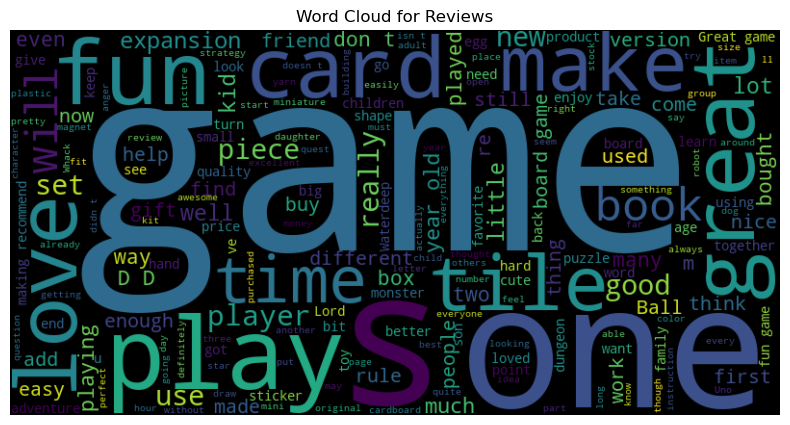

In [43]:
# Review: Plot the WordCloud image.
plt.figure(figsize=(10, 5))
plt.imshow(review_wc, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud for Reviews")
plt.show()

In [45]:
# Summary: Create a word cloud.
summary_text = " ".join(df4['Summary'])
summary_wc = WordCloud(width=800, height=400).generate(summary_text)

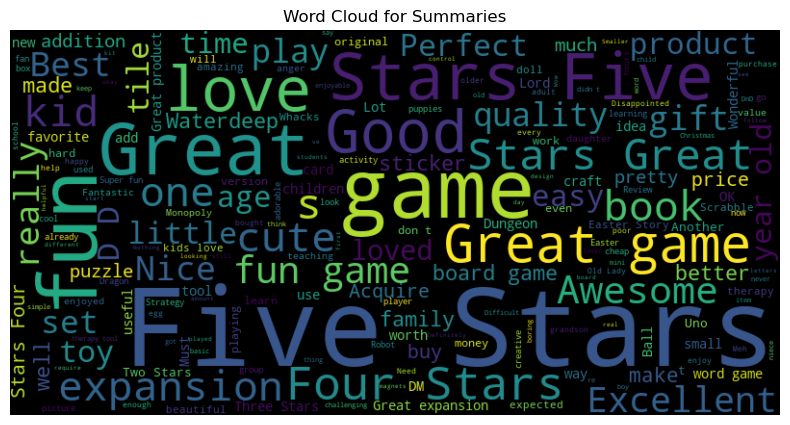

In [47]:
# Summary: Plot the WordCloud image.
plt.figure(figsize=(10, 5))
plt.imshow(summary_wc, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud for Summaries")
plt.show()

Word clouds provide an intuitive, high-level visual summary of the most frequent words in a corpus.
They’re great for exploratory analysis to spot dominant themes quickly, 
but should be complemented by quantitative methods (e.g., frequency tables or sentiment scores) for precise insights.

## 4. Frequency distribution and polarity
### 4a) Create frequency distribution

In [94]:
# Determine the frequency distribution.
import pandas as pd
import matplotlib.pyplot as plt
from nltk.probability import FreqDist
from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob
from collections import Counter

# Tokenize and make lower case
df4 = df3.copy()
df4['Review_tokens'] = df4['Review'].str.lower().apply(word_tokenize)

# Flatten token list
all_tokens = [tok for toks in df4['Review_tokens'] for tok in toks]

# Build frequency distribution
freq_dist = FreqDist(all_tokens)

# Show top 15 raw tokens
print("Top 15 tokens (including stopwords & non-alpha):")
print(freq_dist.most_common(15))

Top 15 tokens (including stopwords & non-alpha):
[('the', 5464), ('and', 3252), ('a', 3190), ('to', 3170), ('of', 2499), ('it', 2491), ('i', 2356), ('is', 1783), ('this', 1781), ('game', 1709), ('for', 1550), ('you', 1318), ('with', 1265), ('in', 1157), ('that', 1107)]


### 4b) Remove alphanumeric characters and stopwords

In [97]:
# Delete all the alpanum.
df4['Review_tokens'] = df4['Review_tokens'].apply(
    lambda toks: [w for w in toks if w.isalpha()]
)

# View output
df4['Review_tokens'].head()

0    [when, it, comes, to, a, dm, s, screen, the, s...
1    [an, open, letter, to, your, unpainted, miniat...
2    [nice, art, nice, printing, why, two, panels, ...
3    [amazing, buy, bought, it, as, a, gift, for, o...
4    [as, my, review, of, s, previous, screens, the...
Name: Review_tokens, dtype: object

In [101]:
# Remove all the stopwords
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
df4['Review_tokens'] = df4['Review_tokens'].apply(
    lambda toks: [w for w in toks if w not in stop_words]
)

# View output
df4['Review_tokens'].head()

0    [comes, dm, screen, space, screen, absolute, p...
1    [open, letter, unpainted, miniatures, bad, spe...
2    [nice, art, nice, printing, two, panels, fille...
3       [amazing, buy, bought, gift, new, dm, perfect]
4    [review, previous, screens, completely, unnece...
Name: Review_tokens, dtype: object

In [105]:
# Build flat list for downstream
filtered_tokens = [w for toks in df4['Review_tokens'] for w in toks]

# Check a sample
print("Sample filtered tokens:", filtered_tokens[:20])

Sample filtered tokens: ['comes', 'dm', 'screen', 'space', 'screen', 'absolute', 'premium', 'fact', 'space', 'wasted', 'art', 'terribly', 'informative', 'needed', 'art', 'well', 'makes', 'completely', 'useless', 'reason']


### 4c) Create wordcloud without stopwords

In [107]:
# Create a wordcloud without stop words.
# Join the filtered tokens into a single string
filtered_text = " ".join(filtered_tokens)

# Generate the word cloud
wc_nostop = WordCloud(width=800, height=400).generate(filtered_text)

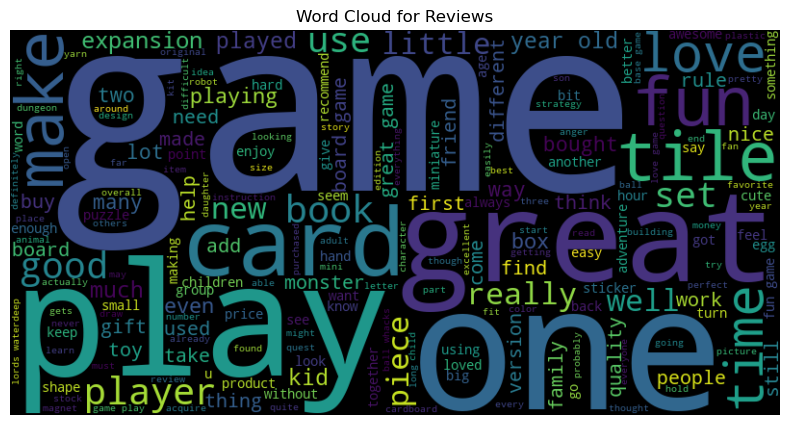

In [113]:
# Plot the wordcloud image.
plt.figure(figsize=(10, 5))
plt.imshow(wc_nostop, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud for Reviews")
plt.show()

### 4d) Identify 15 most common words and polarity

In [115]:
# 1) Get top 15 most common filtered tokens
common = Counter(filtered_tokens).most_common(15)

# 2) Build DataFrame and compute polarity
common_df = pd.DataFrame(common, columns=['word','count'])
common_df['polarity'] = common_df['word']\
    .apply(lambda w: TextBlob(w).sentiment.polarity)

# 3) Display
print(common_df)

      word  count  polarity
0     game   1709      -0.4
1    great    589       0.8
2      fun    558       0.3
3      one    540       0.0
4     play    509       0.0
5     like    421       0.0
6     love    326       0.5
7      get    320       0.0
8   really    319       0.2
9    cards    306       0.0
10   tiles    300       0.0
11    time    297       0.0
12    good    295       0.7
13   would    283       0.0
14    book    278       0.0


## 5. Review polarity and sentiment: Plot histograms of polarity (use 15 bins) and sentiment scores for the respective columns.

In [119]:
# Provided function.
def generate_polarity(comment):
    '''Extract polarity score (-1 to +1) for each comment'''
    return TextBlob(comment).sentiment[0]

In [121]:
# Determine polarity of both columns. 
df3['Review_polarity']  = df3['Review'].apply(generate_polarity)
df3['Summary_polarity'] = df3['Summary'].apply(generate_polarity)

# Determine sentiment score (subjectivity) of both columns.
df3['Review_subjectivity']  = df3['Review'].apply(lambda comment: TextBlob(comment).sentiment[1])
df3['Summary_subjectivity'] = df3['Summary'].apply(lambda comment: TextBlob(comment).sentiment[1])

# View output.
df3[['Review_polarity','Review_subjectivity','Summary_polarity','Summary_subjectivity']].head()

,Review_polarity,Review_subjectivity,Summary_polarity,Summary_subjectivity
0,-0.036111,0.486111,0.15,0.500000
1,0.032684,0.440206,-0.80,0.900000
2,0.115410,0.427755,0.00,0.733333
3,0.578788,0.784848,0.00,0.000000
4,-0.316667,0.316667,0.00,0.000000


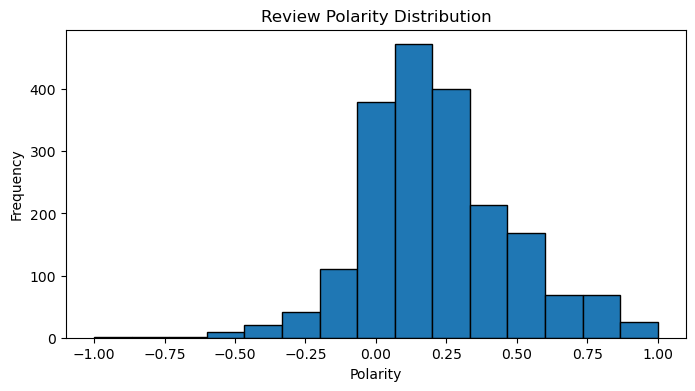

In [125]:
# Review: Create a histogram plot with bins = 15.
# Histogram of polarity
plt.figure(figsize=(8, 4))
plt.hist(df3['Review_polarity'], bins=15, edgecolor='black')
plt.title("Review Polarity Distribution")
plt.xlabel("Polarity")
plt.ylabel("Frequency")
plt.show()

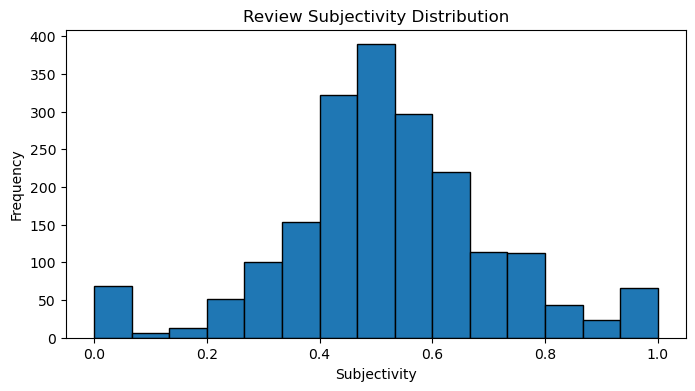

In [127]:
# Histogram of sentiment score
plt.figure(figsize=(8, 4))
plt.hist(df3['Review_subjectivity'], bins=15, edgecolor='black')
plt.title("Review Subjectivity Distribution")
plt.xlabel("Subjectivity")
plt.ylabel("Frequency")
plt.show()

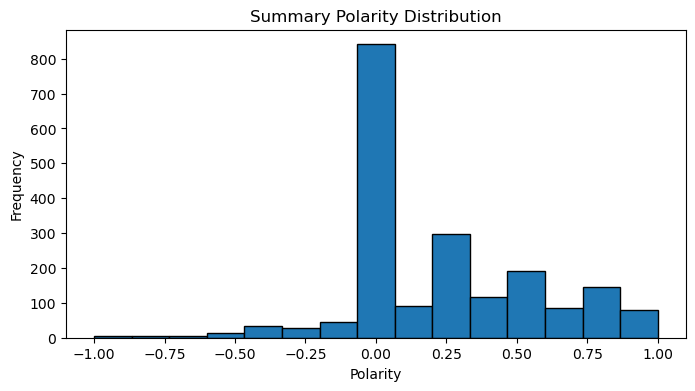

In [129]:
# Summary: Create a histogram plot with bins = 15.
# Histogram of polarity
plt.figure(figsize=(8, 4))
plt.hist(df3['Summary_polarity'], bins=15, edgecolor='black')
plt.title("Summary Polarity Distribution")
plt.xlabel("Polarity")
plt.ylabel("Frequency")
plt.show()

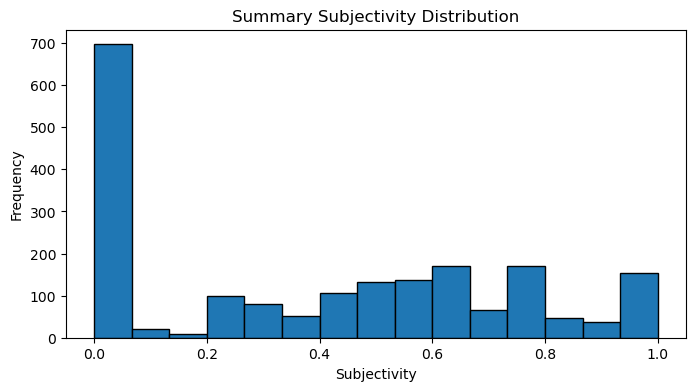

In [131]:
# Histogram of sentiment score
plt.figure(figsize=(8, 4))
plt.hist(df3['Summary_subjectivity'], bins=15, edgecolor='black')
plt.title("Summary Subjectivity Distribution")
plt.xlabel("Subjectivity")
plt.ylabel("Frequency")
plt.show()

## 6. Identify top 20 positive and negative reviews and summaries respectively

In [133]:
# Top 20 negative reviews.
neg_reviews = df3.nsmallest(20, 'Review_polarity')[['Review', 'Review_polarity']]

# View output.
display(neg_reviews)

,Review,Review_polarity
208,BOOO UNLES YOU ARE PATIENT KNOW HOW TO MEASUR...,-1.000000
182,Incomplete kit Very disappointing,-0.780000
523,Used with anger management group and they like...,-0.700000
1784,I m sorry I just find this product to be bori...,-0.583333
363,One of my staff will be using this game soon ...,-0.550000
117,I bought this as a Christmas gift for my grand...,-0.500000
227,this was a gift for my daughter I found it d...,-0.500000
230,I found the directions difficult,-0.500000
290,Instructions are complicated to follow,-0.500000
301,Difficult,-0.500000


In [135]:
# Top 20 negative summaries.
neg_summaries = df3.nsmallest(20, 'Summary_polarity')[['Summary', 'Summary_polarity']]

# View output.
display(neg_summaries)

,Summary,Summary_polarity
21,The worst value I ve ever seen,-1.000000
208,BORING UNLESS YOU ARE A CRAFT PERSON WHICH I A...,-1.000000
823,Boring,-1.000000
1154,before this I hated running any RPG campaign d...,-0.900000
1,Another worthless Dungeon Master s screen from...,-0.800000
144,Disappointed,-0.750000
626,Disappointed,-0.750000
788,Disappointed,-0.750000
1602,Disappointed,-0.750000
362,Promotes anger instead of teaching calming met...,-0.700000


In [137]:
# Top 20 positive reviews.
pos_reviews = df3.nlargest(20, 'Review_polarity')[['Review', 'Review_polarity']]

# View output.
display(pos_reviews)

,Review,Review_polarity
7,Came in perfect condition,1.0
165,Awesome book,1.0
194,Awesome gift,1.0
492,Excellent activity for teaching self managemen...,1.0
520,Perfect just what I ordered,1.0
586,Wonderful product,1.0
604,Delightful product,1.0
616,Wonderful for my grandson to learn the resurre...,1.0
785,Perfect,1.0
927,Awesome,1.0


In [139]:
# Top 20 positive summaries.
pos_summaries = df3.nlargest(20, 'Summary_polarity')[['Summary', 'Summary_polarity']]

# View output.
display(pos_summaries)

,Summary,Summary_polarity
6,Best gm screen ever,1.0
28,Wonderful designs,1.0
32,Perfect,1.0
80,They re the perfect size to keep in the car or...,1.0
134,Perfect for Preschooler,1.0
140,Awesome sticker activity for the price,1.0
161,Awesome Book,1.0
163,He was very happy with his gift,1.0
187,Awesome,1.0
210,Awesome and well designed for 9 year olds,1.0


## 7. Discuss: Insights and observations

***Your observations here...***

### Business Insights
Our analysis shows that customers discuss core components like “game,” “card,” and “tile” most frequently, with overwhelmingly positive terms (“great,” “fun,” “love”) appearing in the top 15 words. Review polarity skews positive: most reviews score between 0.1 and 0.4, with a tail up to +1.0 indicating enthusiastic advocates. Negative feedback exists but is rare. Subjectivity for full reviews centers around 0.4–0.6, meaning users blend factual detail with opinion. Summaries, by contrast, cluster at a polarity of 0.0 and a subjectivity of 0.0, confirming they serve as neutral labels rather than emotional commentary.

### Areas for Further Exploration
• Aspect-based sentiment: isolate feedback on price, quality, and rules to target improvements.
• Topic modelling: uncover hidden themes in that small negative tail (e.g. missing components or confusing instructions).
• Customer segmentation: layer sentiment by player experience or purchase channel for tailored marketing.

### Suggested Actions
• Enhance data capture by adding optional star ratings and specific questions about component quality or rule clarity.
• Collect metadata on player type and purchase date to monitor sentiment shifts over time.
• Build a live sentiment dashboard to alert teams to spikes in positive or negative feedback on new releases.

# 